<a href="https://colab.research.google.com/github/junyong1111/KMU-2022/blob/main/OCR_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!cp -r /content/gdrive/MyDrive/Capstone/OCR/kor.traineddata /usr/share/tesseract-ocr/4.00/tessdata
#### 구글 드라이브에 한글데이터 파일을 코랩 tesseract-ocr 언어 경로로 복사

In [ ]:
#### 필요 라이브러리 import
import matplotlib.pyplot as plt
import cv2
import os
import pytesseract
from pytesseract import Output
from PIL import Image
from google.colab.patches import cv2_imshow
import re
import numpy as np

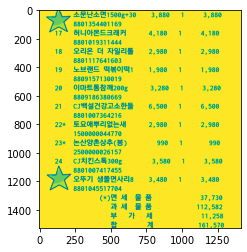

소 문 난 소 면 １５００５+３０ ３,88０ １ ３, 88０
88０１３５44０１ １69

허 니 아 몬 드 크 래 커 4,１8０ １ 4,１8０
88０１０１9３１１444
오 리 온 더 자 일 리 틀 ２,98０ １ ２, 98０
88０１１１764１6０３
노 브 랜 드 떡 볶 이 떡 １ １,98０ １ １, 98０
88０9１５7１３００１9
이 마 트 통 참 깨 ２００8 ３,２8０ １ ３, ２8０
88０9１86３8０669
０２ 백 설 건 강 고 소 한 들  6,５００ １ 6,５００
88０１００7３64２１6
토 요 애 뿌 리 없 는 새 ２98０ １ ２, 98０
１５００００００4477０
논 산 양 촌 상 추 （ 봉 〉 99０ １ 99０
２５００００００２6１５7
67 치 킨 스 톡 ３００8 ３,５8０ １ ３, ５8０
88０１００74１74５５
뚜 기 생 쫄 면 사 리 8  ３,48０ １ ３, 48０
88０１０4５５１77０4
（*) 면 세 물 품 ３7, 7３０
과 세 물 품 １１２,５8２
부 가 세 １１, ２５8
합 계 １6１． ５7０



In [ ]:
image_name = "/content/4.jpeg"
min_conf = 0

image = cv2.imread(image_name)
GRAY = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
height, width = GRAY.shape


####################### Gaussian  ######################
#GRAY = cv2.adaptiveThreshold(GRAY_enlarge,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#cv2.THRESH_BINARY,15,2)
####################### Gaussian  ######################

####################### Enlarge 2x
GRAY_enlarge = cv2.resize(GRAY, (2*width, 2*height), interpolation=cv2.INTER_LINEAR)
####################### Enlarge 2x

###################### Denoising ######################
denoised = cv2.fastNlMeansDenoising(GRAY_enlarge, h=10, searchWindowSize=21, templateWindowSize=7)
###################### Denoising ######################

plt.imshow(GRAY_enlarge)
plt.show()

results = pytesseract.image_to_string(denoised ,lang='kor') ### /usr/share/tesseract-ocr/4.00/tessdata/kor.traineddata 원하는 데이터를 넣어줘야 함
# results = re.compile('[|가-힣|+').sub('', results)
print(results)